# (Ford Gobike)
## by (Mohammed Maher)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# overview of the data shape and type
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

(183412, 16)

In [4]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [5]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [6]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

# Data Cleaning 

In [7]:
#Check for null
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#Drop null values
df.dropna(inplace=True)

In [9]:
#check for duplicated rows
df.duplicated().sum()

0

In [10]:
#change datatype 
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')

df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [12]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [13]:
#convert duration in sec to durition in min
df['duration_sec'] = df['duration_sec']/60

In [14]:
#change colume name from duration_ssec to duration_min
df.rename(columns={'duration_sec':"duration_min"}, inplace=True)

In [15]:
df.head()

,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [16]:
df.describe()

,duration_min,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,11.733379,37.771220,-122.351760,37.771414,-122.351335,4482.587555,1984.803135
std,27.370082,0.100391,0.117732,0.100295,0.117294,1659.195937,10.118731
min,1.016667,37.317298,-122.453704,37.317298,-122.453704,11.000000,1878.000000
25%,5.383333,37.770407,-122.411901,37.770407,-122.411647,3799.000000,1980.000000
50%,8.500000,37.780760,-122.398279,37.781010,-122.397437,4960.000000,1987.000000
75%,13.150000,37.797320,-122.283093,37.797673,-122.286533,5505.000000,1992.000000
max,1409.133333,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2001.000000


In [17]:
#get age 
df['age'] = 2021 - df['member_birth_year']

In [18]:
df.describe()

,duration_min,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,11.733379,37.771220,-122.351760,37.771414,-122.351335,4482.587555,1984.803135,36.196865
std,27.370082,0.100391,0.117732,0.100295,0.117294,1659.195937,10.118731,10.118731
min,1.016667,37.317298,-122.453704,37.317298,-122.453704,11.000000,1878.000000,20.000000
25%,5.383333,37.770407,-122.411901,37.770407,-122.411647,3799.000000,1980.000000,29.000000
50%,8.500000,37.780760,-122.398279,37.781010,-122.397437,4960.000000,1987.000000,34.000000
75%,13.150000,37.797320,-122.283093,37.797673,-122.286533,5505.000000,1992.000000,41.000000
max,1409.133333,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2001.000000,143.000000


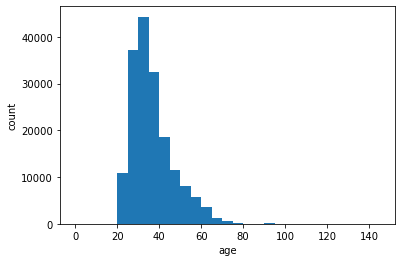

In [19]:
bins = np.arange(0, df['age'].max()+5, 5)
plt.hist(df['age'], bins=bins);
plt.xlabel('age');
plt.ylabel('count');

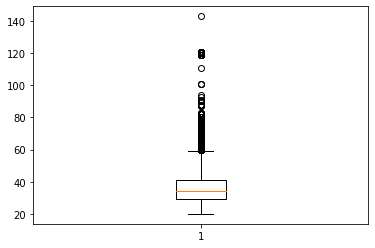

In [20]:
plt.boxplot(df['age']);
plt.show()

In [21]:
# based on the plot above age has outlier
df = df.query('age <= 80')

In [22]:
#change age and member_birth_year to int
df['member_birth_year'] = df['member_birth_year'].astype('int')
df['age'] = df['age'].astype('int')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174749 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_min             174749 non-null  float64       
 1   start_time               174749 non-null  datetime64[ns]
 2   end_time                 174749 non-null  datetime64[ns]
 3   start_station_id         174749 non-null  object        
 4   start_station_name       174749 non-null  object        
 5   start_station_latitude   174749 non-null  float64       
 6   start_station_longitude  174749 non-null  float64       
 7   end_station_id           174749 non-null  object        
 8   end_station_name         174749 non-null  object        
 9   end_station_latitude     174749 non-null  float64       
 10  end_station_longitude    174749 non-null  float64       
 11  bike_id                  174749 non-null  int64         
 12  user_type       

In [24]:
# extract the date, hour, day from start time
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hour_of_day'] = df.start_time.dt.strftime('%H')
df['start_day_of_week'] = df.start_time.dt.strftime('%A')

In [25]:
df.head()

,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,start_hour_of_day,start_day_of_week
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,37,2019-02-28,17,Thursday
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,49,2019-02-28,12,Thursday
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,32,2019-02-28,17,Thursday
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,47,2019-02-28,23,Thursday
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,62,2019-02-28,23,Thursday


In [26]:
#drop columns
df.drop(columns=['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], inplace=True)

In [27]:
df.tail(10)

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,start_hour_of_day,start_day_of_week
183401,6.383333,2019-02-01 00:16:48.062,2019-02-01 00:23:11.201,186.0,Lakeside Dr at 14th St,181.0,Grand Ave at Webster St,4505,Subscriber,1991,Male,Yes,30,2019-02-01,00,Friday
183403,4.150000,2019-02-01 00:15:12.067,2019-02-01 00:19:21.699,256.0,Hearst Ave at Euclid Ave,247.0,Fulton St at Bancroft Way,4642,Subscriber,2000,Male,No,21,2019-02-01,00,Friday
183404,4.266667,2019-02-01 00:12:50.554,2019-02-01 00:17:07.362,241.0,Ashby BART Station,248.0,Telegraph Ave at Ashby Ave,4845,Subscriber,1980,Male,Yes,41,2019-02-01,00,Friday
183405,1.850000,2019-02-01 00:14:49.874,2019-02-01 00:16:41.301,324.0,Union Square (Powell St at Post St),19.0,Post St at Kearny St,4832,Subscriber,1984,Male,No,37,2019-02-01,00,Friday
183406,11.766667,2019-02-01 00:04:40.616,2019-02-01 00:16:27.080,138.0,Jersey St at Church St,78.0,Folsom St at 9th St,5017,Subscriber,1988,Male,No,33,2019-02-01,00,Friday
183407,8.000000,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,324.0,Union Square (Powell St at Post St),4832,Subscriber,1996,Male,No,25,2019-02-01,00,Friday
183408,5.216667,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),66.0,3rd St at Townsend St,4960,Subscriber,1984,Male,No,37,2019-02-01,00,Friday
183409,2.350000,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,277.0,Morrison Ave at Julian St,3824,Subscriber,1990,Male,Yes,31,2019-02-01,00,Friday
183410,2.316667,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,216.0,San Pablo Ave at 27th St,5095,Subscriber,1988,Male,No,33,2019-02-01,00,Friday
183411,4.516667,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24.0,Spear St at Folsom St,37.0,2nd St at Folsom St,1057,Subscriber,1989,Male,No,32,2019-02-01,00,Friday


In [28]:
df.shape

(174749, 16)

### What is the structure of your dataset?

> there are 174749 row data in the dataset (ford Gobike) with 17 variable, we can see the variables like this 

>1- Trip data : duratio_min, start and end time (i used start time to extract more useful data from it like  date, hour of the day, day of the week, month when the trip happened so we can use them later on)

>2- station info; station name, station id for both start and end points

>3- user info: user type, birth year, age, gender

### What is/are the main feature(s) of interest in your dataset?

> i'm intersted to know if the user type affect the duraion of the trip and what is the usual trips time and what gender ride bikes more and what duration 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> user type, age, trip duration, gender, trip hour and day 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

>what is the most frequently hour and day for rides

>what is the majority type of the users

>which gender do more trips

>what the average age for users

>what in the average trip duration

## what is the most frequently hour and day for rides

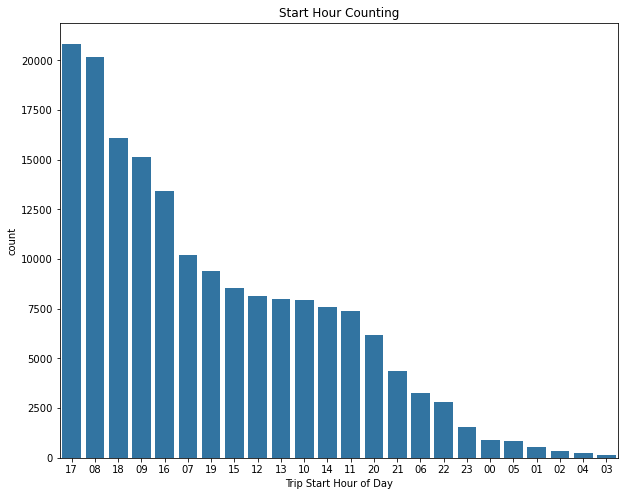

In [46]:
plt.figure(figsize=(10,8))
base_color= sb.color_palette()[0]
order= df['start_hour_of_day'].value_counts().index
sb.countplot(data=df,  x='start_hour_of_day', color=base_color,order=order);
plt.xlabel('Trip Start Hour of Day');
plt.title('Start Hour Counting');

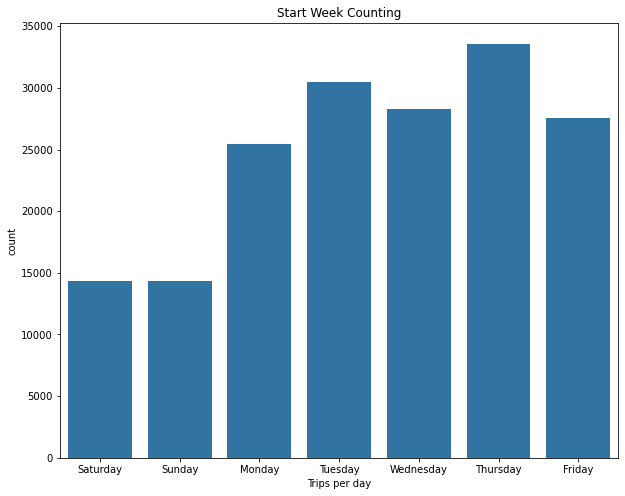

In [47]:
plt.figure(figsize=(10,8))

days = ['Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday' ]
daycat = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df['start_day_of_week'] = df['start_day_of_week'].astype(daycat)

sb.countplot(data=df,  x='start_day_of_week', color=base_color);
plt.xlabel('Trips per day');
plt.title('Start Week Counting');

from the 2 previuse plots we can see in the first one that the hours peaks at two times 8 and 17 during rush hours 

from the second plot we can see that the majority happened on work days (from monday to friday) so most people probably use them for commuting

## what is the majority type of the users

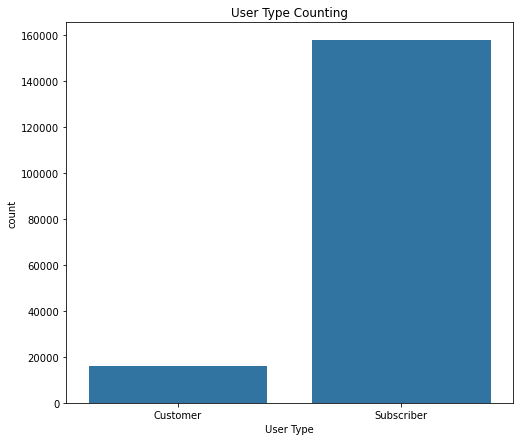

In [48]:
plt.figure(figsize=(8,7))

sb.countplot(data=df, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.title('User Type Counting');

we can see that the majority of the users are Subscribers

## Which gender has the most rides

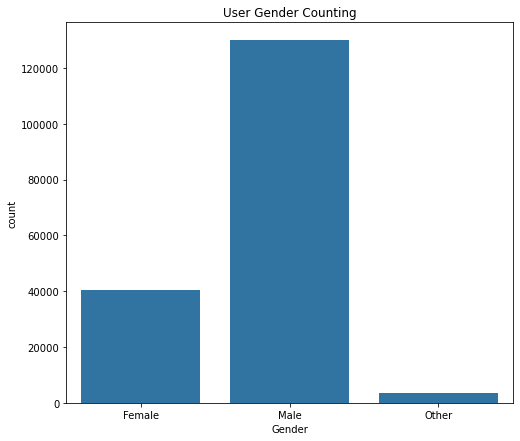

In [49]:
plt.figure(figsize=(8,7))

sb.countplot(data=df, x='member_gender', color=base_color);
plt.xlabel('Gender');
plt.title('User Gender Counting');

males have the most rides

## what the average age for users

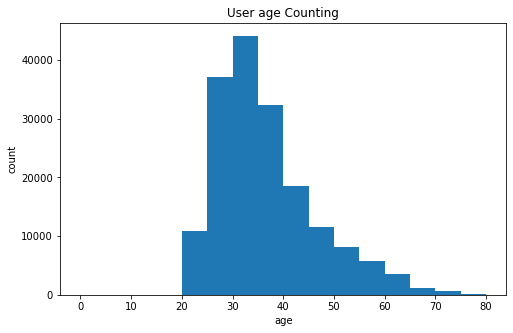

In [50]:
bins = np.arange(0, df['age'].max()+5, 5);

plt.figure(figsize=[8, 5]);
plt.hist(data = df.dropna(), x = 'age', bins = bins);
plt.xlabel('age');
plt.ylabel("count");
plt.title('User age Counting');

the average age for users around 30-35

## what in the average trip duration

In [34]:
df[df['duration_min'] >= 60]

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,start_hour_of_day,start_day_of_week
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,37,2019-02-28,17,Thursday
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,49,2019-02-28,12,Thursday
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,32,2019-02-28,17,Thursday
91,93.683333,2019-02-28 21:41:16.900,2019-02-28 23:14:58.186,252.0,Channing Way at Shattuck Ave,244.0,Shattuck Ave at Hearst Ave,5244,Subscriber,1997,Female,No,24,2019-02-28,21,Thursday
163,83.300000,2019-02-28 21:22:51.632,2019-02-28 22:46:10.114,6.0,The Embarcadero at Sansome St,16.0,Steuart St at Market St,5149,Customer,1987,Male,No,34,2019-02-28,21,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180894,79.833333,2019-02-01 08:39:00.243,2019-02-01 09:58:50.831,107.0,17th St at Dolores St,21.0,Montgomery St BART Station (Market St at 2nd St),3248,Subscriber,1986,Male,No,35,2019-02-01,08,Friday
181707,66.333333,2019-02-01 07:58:36.852,2019-02-01 09:04:57.425,141.0,Valencia St at Cesar Chavez St,15.0,San Francisco Ferry Building (Harry Bridges Pl...,5454,Subscriber,1975,Female,Yes,46,2019-02-01,07,Friday
182133,101.433333,2019-02-01 07:00:02.042,2019-02-01 08:41:28.251,380.0,Masonic Ave at Turk St,377.0,Fell St at Stanyan St,4956,Subscriber,1971,Other,No,50,2019-02-01,07,Friday
182411,226.816667,2019-02-01 04:38:43.601,2019-02-01 08:25:33.493,106.0,Sanchez St at 17th St,79.0,7th St at Brannan St,4944,Subscriber,1982,Male,Yes,39,2019-02-01,04,Friday


In [35]:
df.duration_min.describe()

count    174749.000000
mean         11.738343
std          27.384592
min           1.016667
25%           5.383333
50%           8.516667
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

the duration has outlier for the most trips it's less than 60 min 

In [36]:
df = df.query('duration_min <= 100')
df.head()

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,start_hour_of_day,start_day_of_week
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,47,2019-02-28,23,Thursday
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,62,2019-02-28,23,Thursday
6,19.116667,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983,Female,No,38,2019-02-28,23,Thursday
7,26.916667,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989,Male,No,32,2019-02-28,23,Thursday
8,26.166667,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548,Subscriber,1988,Other,No,33,2019-02-28,23,Thursday


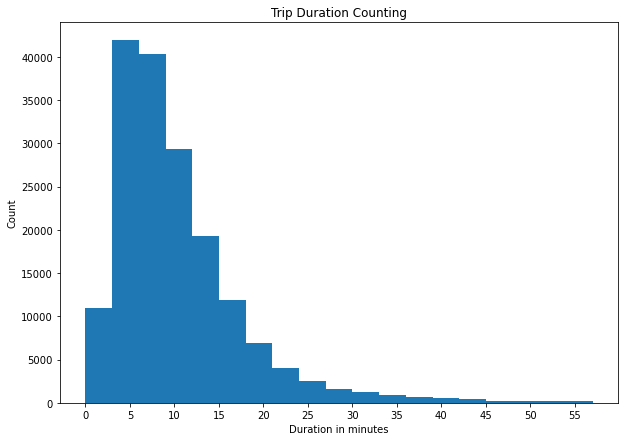

In [51]:
bins = np.arange(0, 60, 3);
ticks = np.arange(0, 60, 5)
plt.figure(figsize=(10,7))
plt.xticks(ticks, ticks);
plt.hist(data=df, x='duration_min', bins=bins);
plt.xlabel("Duration in minutes");
plt.ylabel("Count");
plt.title('Trip Duration Counting');

it looks like most trips are between 5 to 10 minutes 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

the rush hours are the highest trips count of all time which are 8-9 am and 17-18pm during a day.

there were more trips on work days (monday to friday) than workdays

as for users there were more males than females. and most rides are done by subscribers.

most rides are short between 5 to 10 minutes. also there were some rides more than 24h but we consider it as outlier.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

the duration in minutes has outlier as some trips are more than 24 hours. we userd the trip under 100 minutes to zoom in the data to make the data more cleaner. in order to do so i used query() to filter the outlier here and for age as well as the age also has outlier so i choose age under 80 only

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

>does the user type affect the trip duration?

>which days has more average trip duration?



## does the user type affect the trip duration?

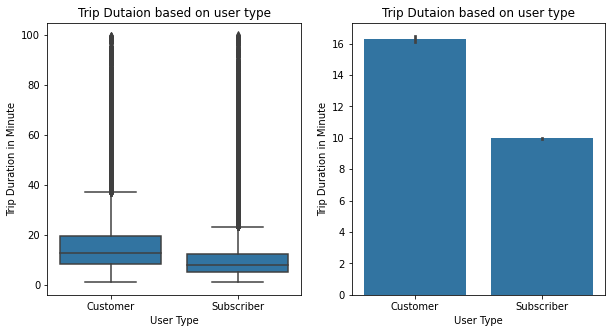

In [53]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sb.boxplot(data=df, x='user_type', y='duration_min', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');
plt.title('Trip Dutaion based on user type');
plt.subplot(1,2,2)
sb.barplot(data=df,  x='user_type', y='duration_min', color=base_color)
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');
plt.title('Trip Dutaion based on user type');

Customers trip duration more than subscribers

## which days has more average trip duration?

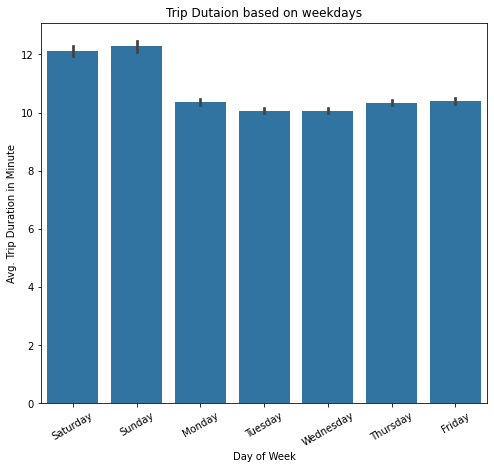

In [54]:
plt.figure(figsize=(8,7))
sb.barplot(data=df, x='start_day_of_week', y='duration_min', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.xticks(rotation=30);
plt.title('Trip Dutaion based on weekdays');

average trip duration during weekends are more than the workdays

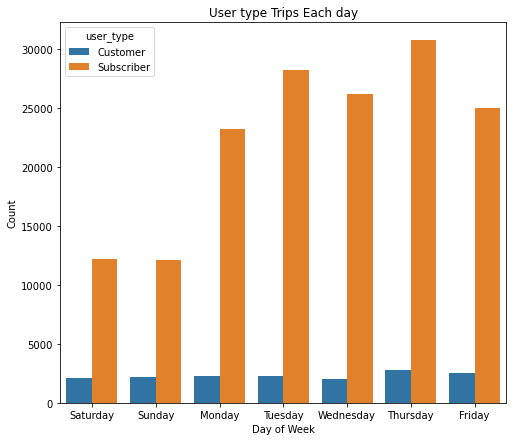

In [55]:
plt.figure(figsize=(8,7))
sb.countplot(data=df,x='start_day_of_week',hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('User type Trips Each day');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

customers have more average trip time than subscribers and also base on last 2 plots we can see that the average trip duration during weekends are more than the average trip on work days and based on the last plot we can see that on week ends (saturday and sunday) there were drop on rides counts for subscribers which means that subscribers uses bikes to go to work and commit during workdays and almost the opposite for customers they have slight increase rides on weekends that means they use it for fun 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

yes customers trip duration more than subscribers on average.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

>which type of users has more trip duration per day

>what is the highest trip duragion based on gender and age

## which type of users has more trip duration per day?

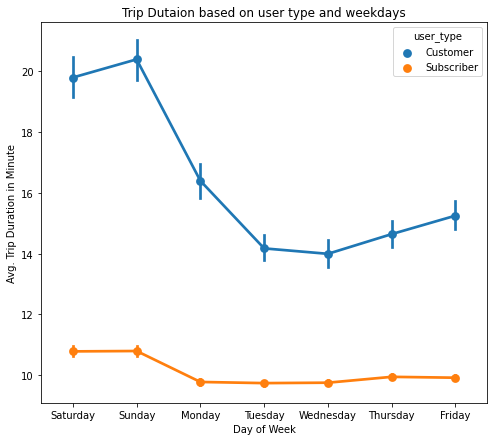

In [56]:
plt.figure(figsize=(8,7))
sb.pointplot(data=df, x='start_day_of_week', y='duration_min', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('Trip Dutaion based on user type and weekdays');

customers have more trip duration than subscribers 

## what is the highest trip duragion based on gender and age

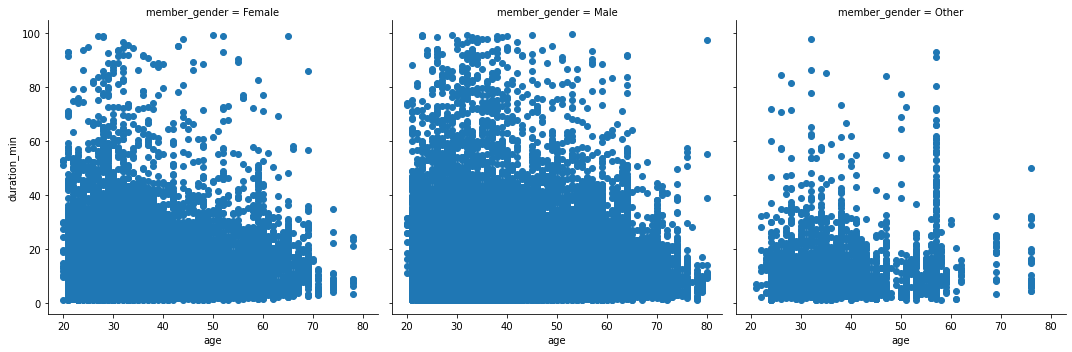

In [45]:
g=sb.FacetGrid(data=df,col='member_gender',col_wrap=3,size=5)
g.map(plt.scatter,'age','duration_min')  
plt.show()

males between 30-50 have the highest trip duration  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

the first plot confirme what i find above as customers have higher trip duration than subscriber and their trip on weekends are much higher as i mentined before they may useing bikes for fun on weekends

### Were there any interesting or surprising interactions between features?

no 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!